In [110]:
import pandas as pd
coolers = pd.read_csv('/Users/marielalvarez/Downloads/h4h/Hack4Her/datos/Dataset _ Coolers AC/coolers.csv')
calendar = pd.read_csv('/Users/marielalvarez/Downloads/h4h/Hack4Her/datos/Dataset _ Coolers AC/calendar.csv')
sales = pd.read_csv('/Users/marielalvarez/Downloads/h4h/Hack4Her/datos/Dataset _ Coolers AC/sales.csv')
warnings = pd.read_csv('/Users/marielalvarez/Downloads/h4h/Hack4Her/datos/Dataset _ Coolers AC/warnings.csv')

# Coolers

In [111]:
coolers['warning'] = coolers['cooler_id'].isin(warnings['cooler_id']).astype(int)

In [112]:
coolers

,cooler_id,door_opens,open_time,compressor,power,on_time,min_voltage,max_voltage,temperature,calday,warning
0,767436ca4a132715e8fe6cff5ad1f2facbf0584aafd715...,28.0,1.0,32.6042,108.5000,24.0,84.0,120.0,5.2854,20241103,0
1,767436ca4a132715e8fe6cff5ad1f2facbf0584aafd715...,13.0,1.0,35.0313,75.1667,16.0,94.0,120.0,4.8938,20241104,0
2,767436ca4a132715e8fe6cff5ad1f2facbf0584aafd715...,23.0,1.0,37.1633,126.3333,24.0,84.0,118.0,4.8449,20241102,0
3,767436ca4a132715e8fe6cff5ad1f2facbf0584aafd715...,37.0,1.0,21.3750,66.5833,24.0,78.0,118.0,5.2896,20250126,0
4,767436ca4a132715e8fe6cff5ad1f2facbf0584aafd715...,22.0,0.0,22.4681,67.8333,23.5,96.0,118.0,5.2426,20250125,0
...,...,...,...,...,...,...,...,...,...,...,...
335211,062126a4a13cb049fa75dab39c58edeaeadbde972917b3...,122.0,53.0,38.3958,187.5000,24.0,118.0,126.0,4.6625,20250228,0
335212,062126a4a13cb049fa75dab39c58edeaeadbde972917b3...,92.0,34.0,25.1458,127.3333,24.0,118.0,126.0,3.8688,20250227,0
335213,062126a4a13cb049fa75dab39c58edeaeadbde972917b3...,97.0,25.0,24.1667,123.7500,24.0,116.0,126.0,3.8333,20250226,0
335214,062126a4a13cb049fa75dab39c58edeaeadbde972917b3...,113.0,40.0,25.7500,129.1667,24.0,118.0,126.0,3.8729,20250225,0


In [113]:
coolers.cooler_id.nunique()

7312

<Axes: xlabel='temperature', ylabel='Count'>

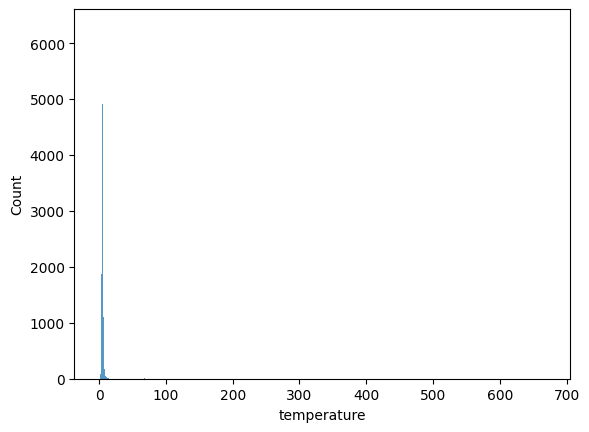

In [114]:
import seaborn as sns
sns.histplot(coolers.temperature)

### buscando outliers

In [929]:
coolers.describe()

,door_opens,open_time,compressor,power,on_time,min_voltage,max_voltage,temperature,warning
count,314295.000000,335142.000000,314632.000000,314295.000000,328303.000000,307378.000000,307378.000000,314816.000000,335216.000000
mean,561.595794,225.574300,124.583588,102.865075,20.887683,110.758535,127.196517,5.152613,0.006026
std,4292.440553,1721.084087,653.327358,89.704069,5.551279,20.283480,11.933060,7.822733,0.077393
min,-1.000000,-1.000000,-1.000000,0.000000,0.500000,0.000000,0.000000,-3.204200,0.000000
25%,16.000000,0.000000,25.937500,40.166700,18.000000,110.000000,124.000000,4.228600,0.000000
50%,37.000000,2.000000,36.276600,85.583300,24.000000,114.000000,126.000000,4.852100,0.000000
75%,71.000000,8.000000,51.875000,146.333300,24.000000,120.000000,130.000000,5.533300,0.000000
max,543010.000000,63925.000000,27705.000000,922.916700,24.000000,152.000000,508.000000,672.000000,1.000000


### identificando valores nulos

In [130]:
coolers.isna().sum()

cooler_id          0
door_opens     20921
open_time         74
compressor     20584
power          20921
on_time         6913
min_voltage    27838
max_voltage    27838
temperature    20400
calday             0
warning            0
dtype: int64

In [131]:
coolers[coolers.min_voltage.isna()]

,cooler_id,door_opens,open_time,compressor,power,on_time,min_voltage,max_voltage,temperature,calday,warning
21,1a7da0241d9242b0ae9f019085d7114ff80976dbea5954...,NaN,10.0,0.1379,NaN,24.0,NaN,NaN,8.5345,20240612,0
22,1a7da0241d9242b0ae9f019085d7114ff80976dbea5954...,NaN,11.0,0.1667,NaN,24.0,NaN,NaN,5.5208,20241223,0
23,1a7da0241d9242b0ae9f019085d7114ff80976dbea5954...,NaN,57.0,0.0417,NaN,24.0,NaN,NaN,5.8062,20241222,0
24,1a7da0241d9242b0ae9f019085d7114ff80976dbea5954...,NaN,6.0,0.0417,NaN,24.0,NaN,NaN,5.2750,20241221,0
25,1a7da0241d9242b0ae9f019085d7114ff80976dbea5954...,NaN,15.0,0.0625,NaN,24.0,NaN,NaN,5.2771,20241220,0
...,...,...,...,...,...,...,...,...,...,...,...
335124,363f15da8f45ea9101e9b7ed6daeff0e7b3691974a3aff...,NaN,0.0,NaN,NaN,24.0,NaN,NaN,NaN,20250301,0
335125,363f15da8f45ea9101e9b7ed6daeff0e7b3691974a3aff...,NaN,0.0,NaN,NaN,24.0,NaN,NaN,NaN,20250221,0
335126,363f15da8f45ea9101e9b7ed6daeff0e7b3691974a3aff...,NaN,0.0,NaN,NaN,24.0,NaN,NaN,NaN,20250313,0
335127,363f15da8f45ea9101e9b7ed6daeff0e7b3691974a3aff...,NaN,0.0,NaN,NaN,24.0,NaN,NaN,NaN,20250321,0


In [157]:
coolers.calday = coolers.calday.astype(str)

In [158]:
coolers.calday.value_counts()

calday
20250405    2887
20250403    2882
20250402    2806
20250404    2757
20250401    2739
            ... 
20230513      10
20230112      10
20230116      10
20230114       9
20230113       8
Name: count, Length: 851, dtype: int64

### separando dataframes entre los que han fallado y los que no

In [132]:
falla = coolers[coolers.warning == 1]

In [133]:
funciona = coolers[coolers.warning == 0]

<Axes: xlabel='temperature'>

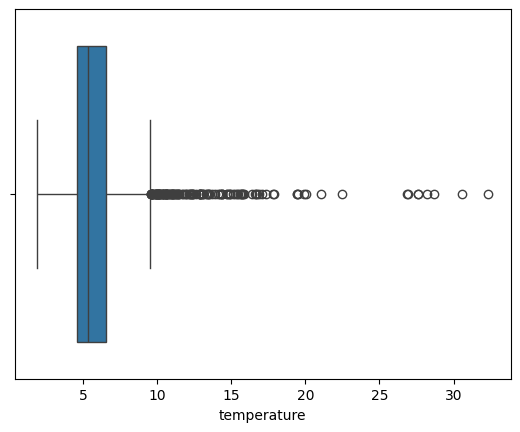

In [134]:
sns.boxplot(data = falla, x = 'temperature') # celsius

<Axes: xlabel='temperature'>

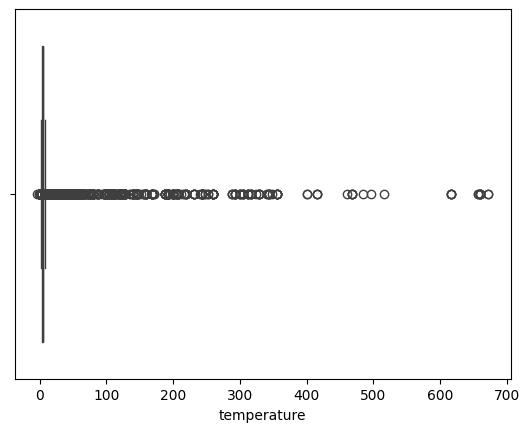

In [135]:
sns.boxplot(data = funciona, x = 'temperature') # celsius

### comportamientos durante el tiempo / entendiendo el dataset

/var/folders/l9/hx3k3fcs03d6gz71m2n3t1c80000gn/T/ipykernel_11980/2228651075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falla['calday'] = pd.to_datetime(falla['calday'].astype(str), format='%Y%m%d')
/var/folders/l9/hx3k3fcs03d6gz71m2n3t1c80000gn/T/ipykernel_11980/2228651075.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falla['year'] = falla['calday'].dt.year
/var/folders/l9/hx3k3fcs03d6gz71m2n3t1c80000gn/T/ipykernel_11980/2228651075.py:5: SettingWithCopyWarning: 
A value is trying to be set on

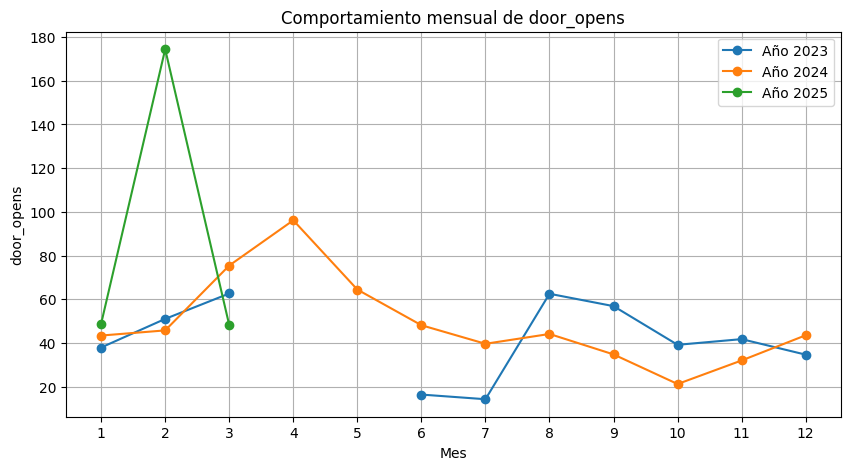

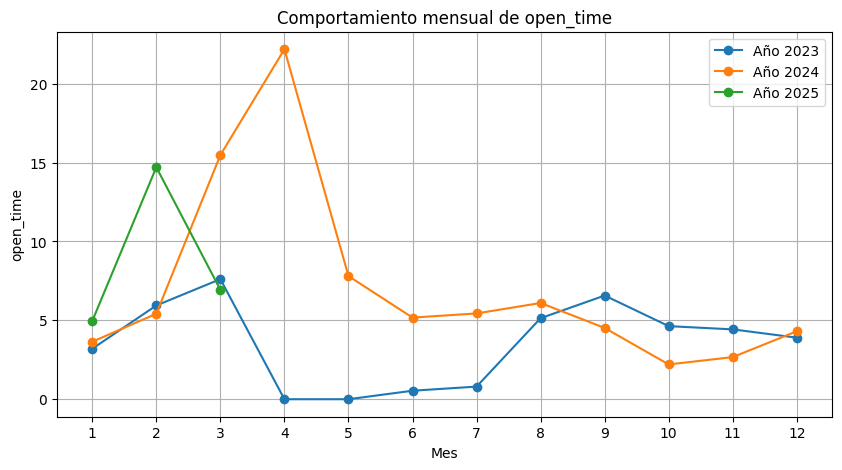

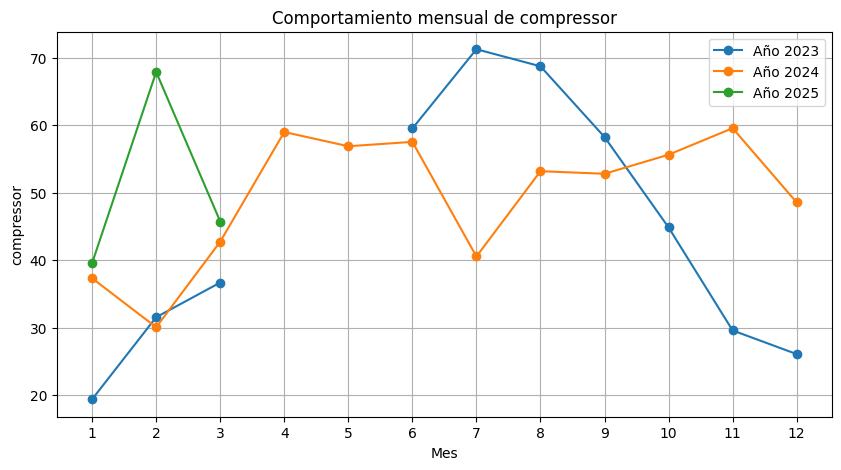

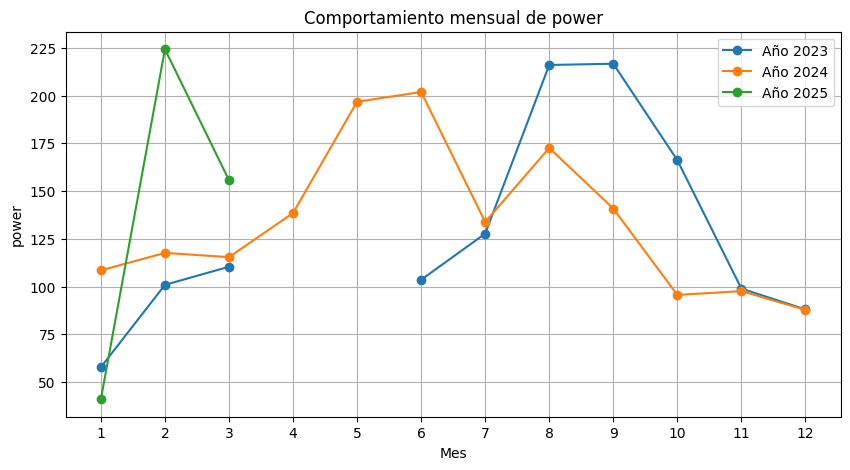

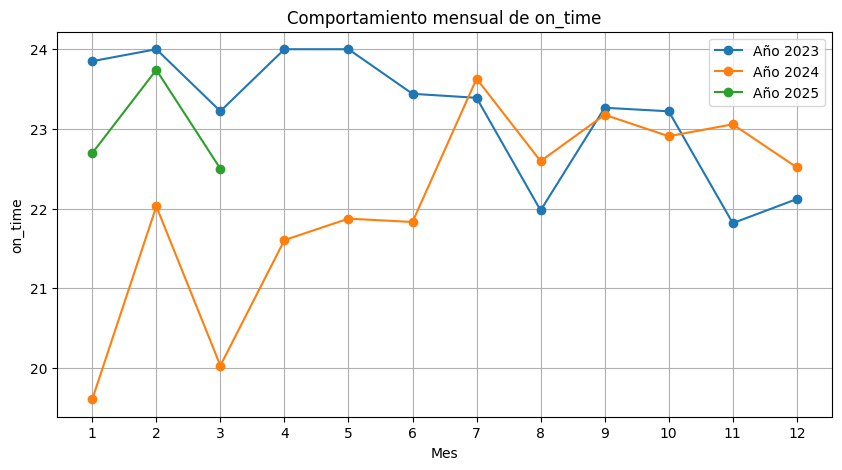

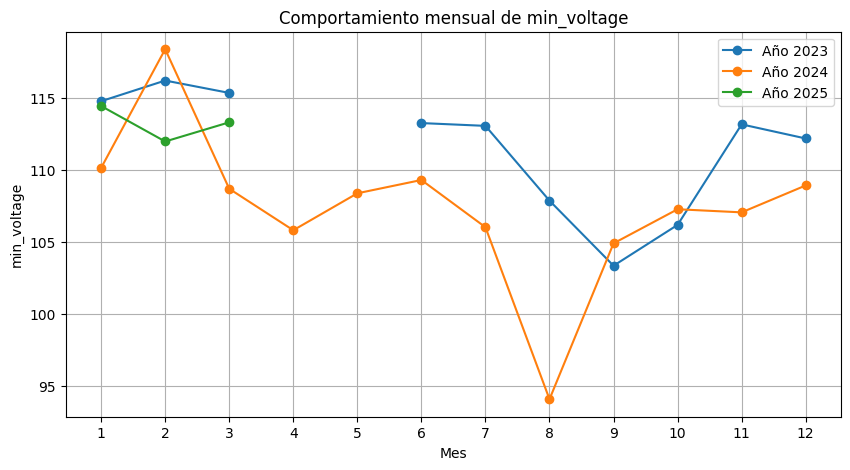

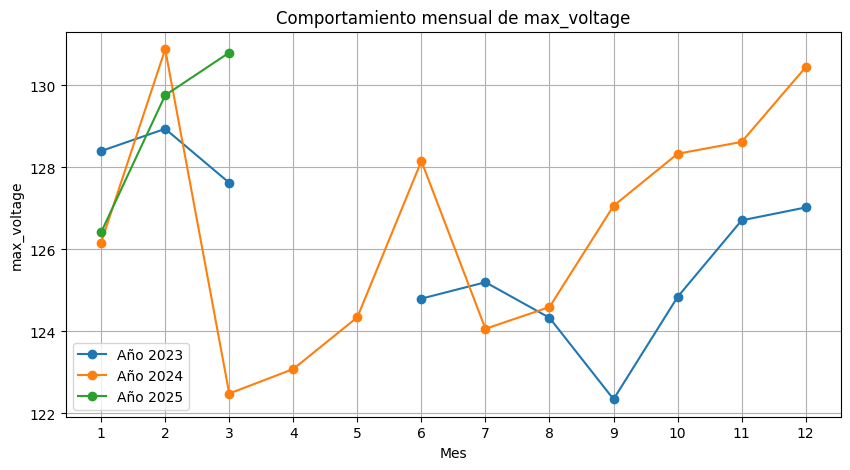

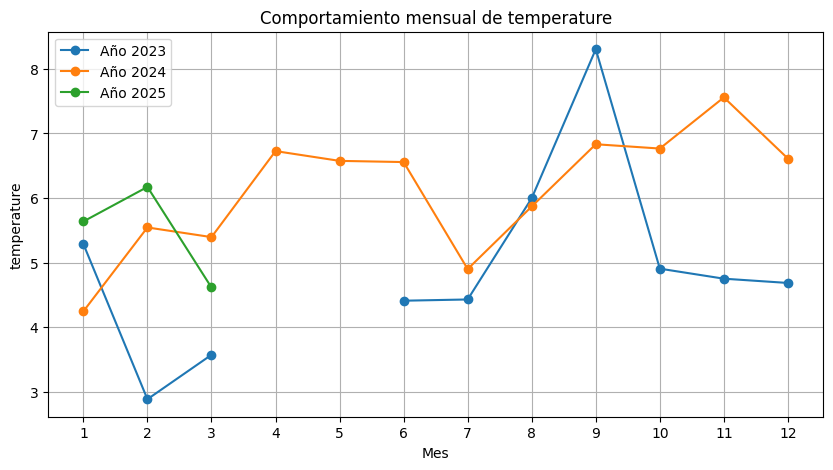

In [139]:

falla['calday'] = pd.to_datetime(falla['calday'].astype(str), format='%Y%m%d')

falla['year'] = falla['calday'].dt.year
falla['month'] = falla['calday'].dt.month

monthly_means = falla.groupby(['year', 'month']).mean(numeric_only=True).reset_index()

features = ['door_opens', 'open_time', 'compressor', 'power', 
            'on_time', 'min_voltage', 'max_voltage', 'temperature']

for feature in features:
    plt.figure(figsize=(10, 5))
    
    for year in sorted(monthly_means['year'].unique()):
        subset = monthly_means[monthly_means['year'] == year]
        plt.plot(subset['month'], subset[feature], marker='o', label=f'Año {year}')
    
    plt.title(f'Comportamiento mensual de {feature}')
    plt.xlabel('Mes')
    plt.ylabel(f'{feature}')
    plt.xticks(range(1, 13))
    plt.legend()
    plt.grid(True)
    plt.show()


In [149]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_cooler_features_by_month(df, cooler_id):
    """
    Genera gráficas por mes y año para cada feature de un cooler específico.

    :param df: DataFrame con los datos
    :param cooler_id: ID del cooler a analizar
    """
    df_cooler = df[df['cooler_id'] == cooler_id].copy()
    
    if df_cooler.empty:
        print(f"No se encontraron datos para cooler_id: {cooler_id}")
        return
    
    df_cooler['calday'] = pd.to_datetime(df_cooler['calday'], errors='coerce', infer_datetime_format=True)
    
    if df_cooler['calday'].isnull().any():
        print("Advertencia: algunas fechas no se pudieron convertir y se omitirán.")
        df_cooler = df_cooler.dropna(subset=['calday'])
    
    df_cooler['year'] = df_cooler['calday'].dt.year
    df_cooler['month'] = df_cooler['calday'].dt.month
    
    monthly_means = df_cooler.groupby(['year', 'month']).mean(numeric_only=True).reset_index()
    
    features = ['door_opens', 'open_time', 'compressor', 'power', 
                'on_time', 'min_voltage', 'max_voltage', 'temperature']
    
    for feature in features:
        plt.figure(figsize=(10, 5))
        
        for year in sorted(monthly_means['year'].unique()):
            subset = monthly_means[monthly_means['year'] == year]
            plt.plot(subset['month'], subset[feature], marker='o', label=f'Año {year}')
        
        plt.title(f'Comportamiento mensual de {feature} (Cooler {cooler_id})')
        plt.xlabel('Mes')
        plt.ylabel(feature)
        plt.xticks(range(1, 13))
        plt.legend()
        plt.grid(True)
        plt.show()


In [161]:
coolers.columns

Index(['cooler_id', 'door_opens', 'open_time', 'compressor', 'power',
       'on_time', 'min_voltage', 'max_voltage', 'temperature', 'calday',
       'warning'],
      dtype='object')

/var/folders/l9/hx3k3fcs03d6gz71m2n3t1c80000gn/T/ipykernel_11980/1791527966.py:19: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_cooler['calday'] = pd.to_datetime(df_cooler['calday'], errors='coerce', infer_datetime_format=True)


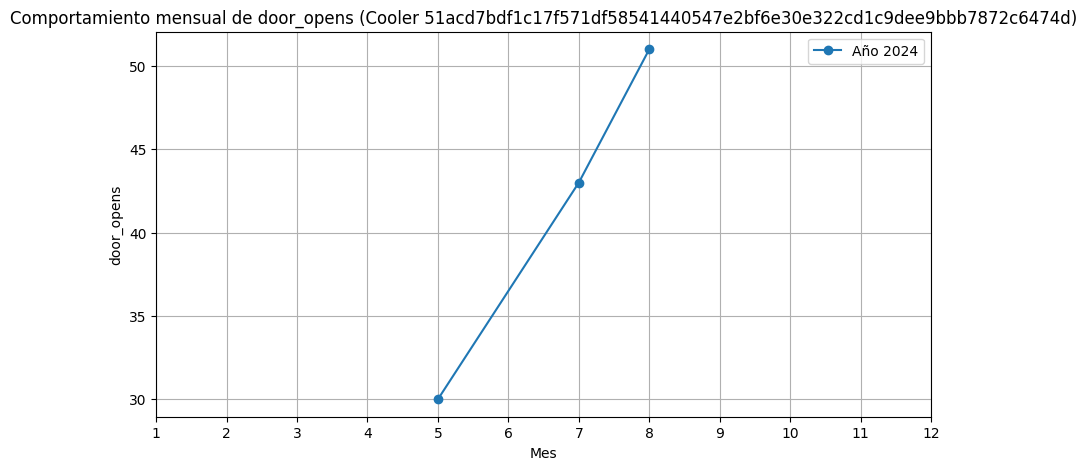

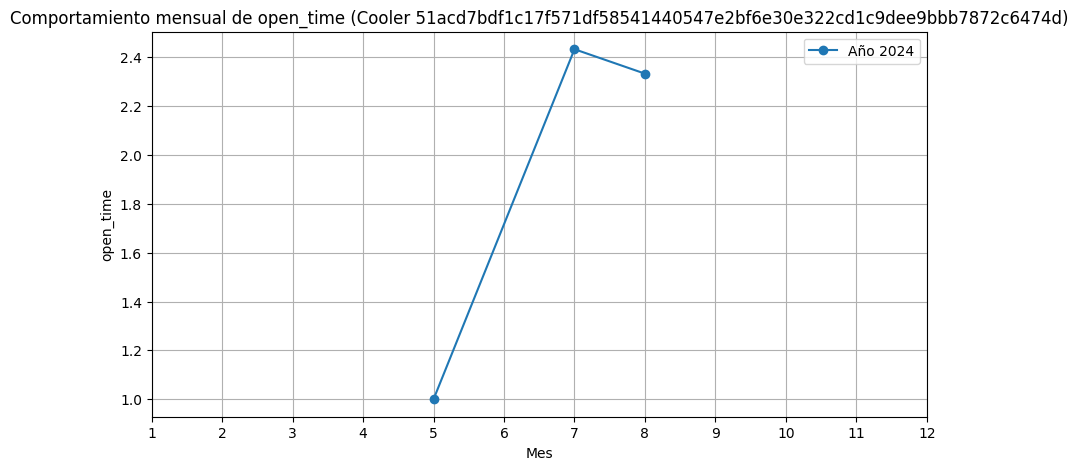

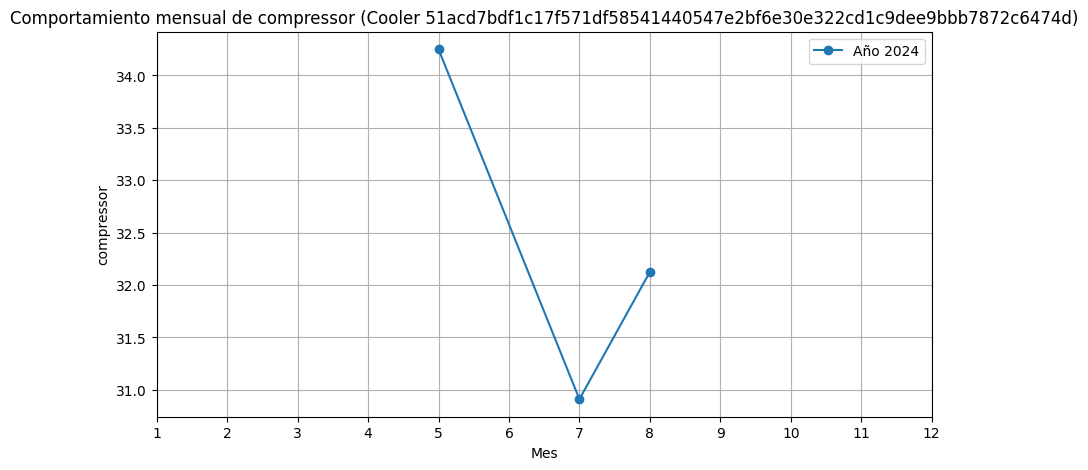

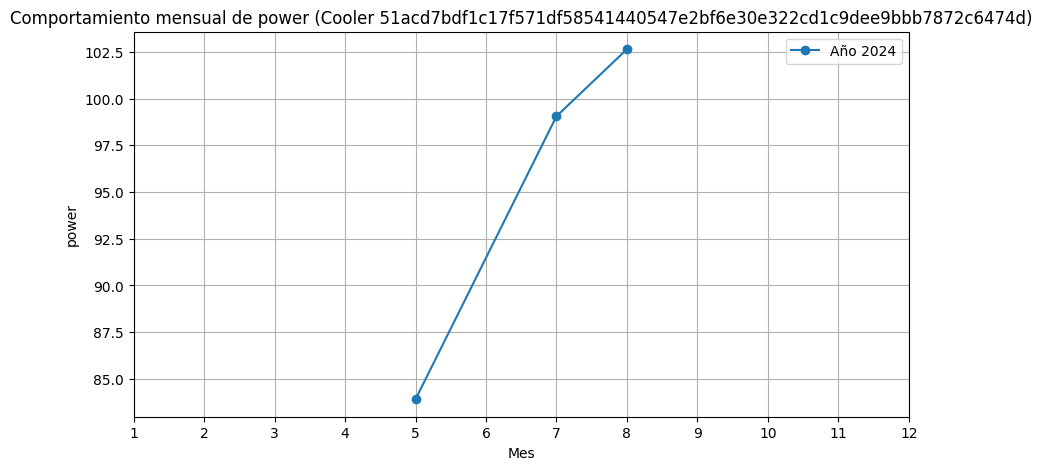

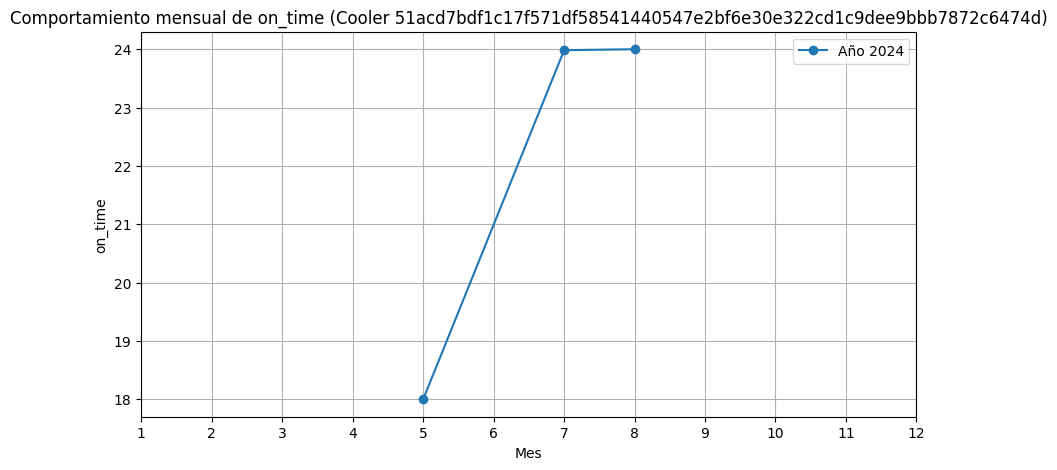

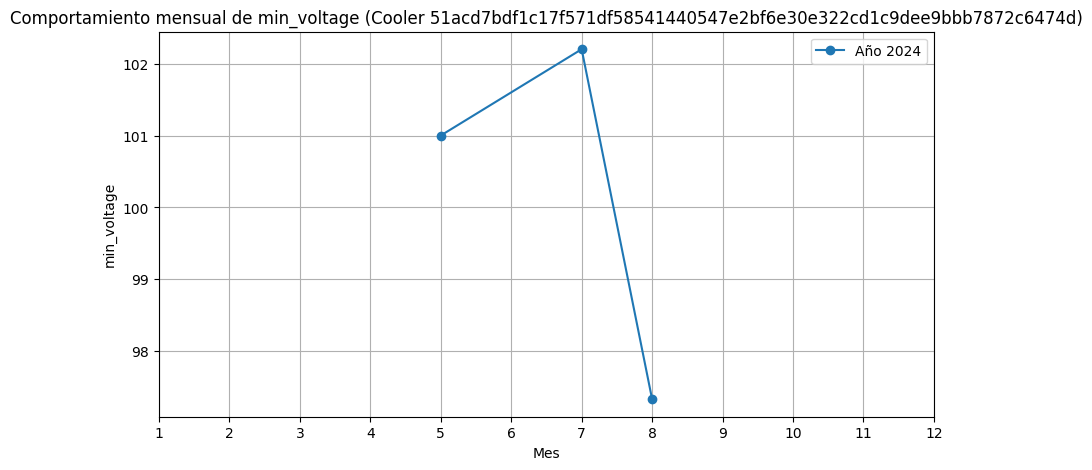

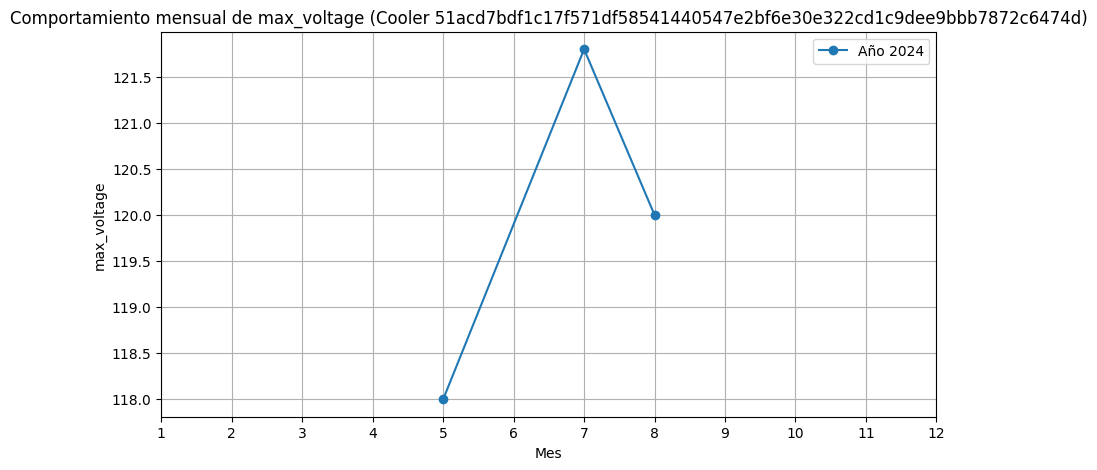

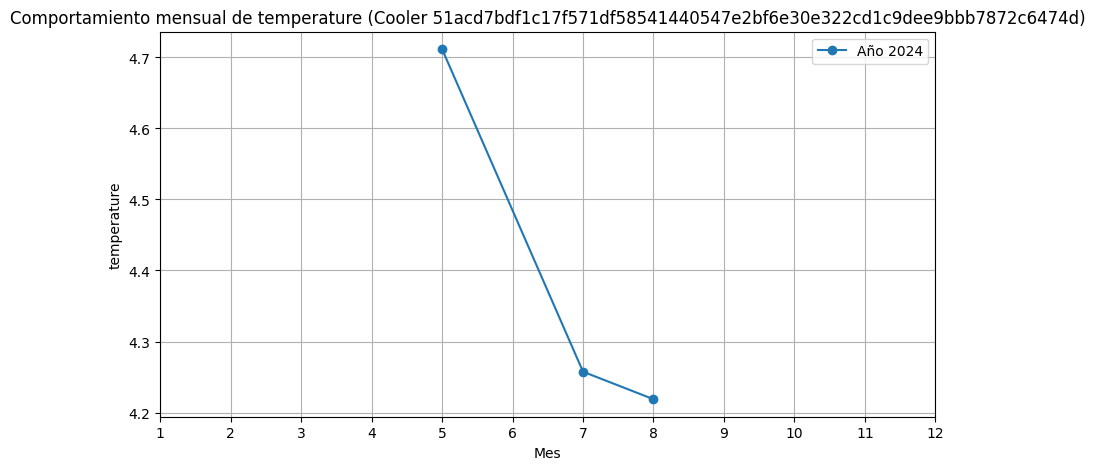

In [156]:
plot_cooler_features_by_month(falla, '51acd7bdf1c17f571df58541440547e2bf6e30e322cd1c9dee9bbb7872c6474d')

In [166]:

def plot_cooler_features_by_day(df, cooler_id):
    """
    Genera gráficas por día del mes y año para cada feature de un cooler específico.

    :param df: DataFrame con los datos
    :param cooler_id: ID del cooler a analizar
    """
    df_cooler = df[df['cooler_id'] == cooler_id].copy()
    
    if df_cooler.empty:
        print(f"No se encontraron datos para cooler_id: {cooler_id}")
        return
    
    df_cooler['calday'] = pd.to_datetime(df_cooler['calday'], errors='coerce', infer_datetime_format=True)
    
    if df_cooler['calday'].isnull().any():
        print("Advertencia: algunas fechas no se pudieron convertir y se omitirán.")
        df_cooler = df_cooler.dropna(subset=['calday'])
    
    df_cooler['year'] = df_cooler['calday'].dt.year
    df_cooler['month'] = df_cooler['calday'].dt.month
    df_cooler['day'] = df_cooler['calday'].dt.day
    
    daily_means = df_cooler.groupby(['year', 'month', 'day']).mean(numeric_only=True).reset_index()
    
    features = ['door_opens', 'open_time', 'compressor', 'power', 
                'on_time', 'min_voltage', 'max_voltage', 'temperature']
    
    for feature in features:
        plt.figure(figsize=(12, 6))
        
        for (year, month), group in daily_means.groupby(['year', 'month']):
            plt.plot(group['day'], group[feature], marker='o', label=f'{year}-{month:02d}')
        
        plt.title(f'Comportamiento diario de {feature} (Cooler {cooler_id})')
        plt.xlabel('Día del mes')
        plt.ylabel(feature)
        plt.xticks(range(1, 32))
        plt.legend(title='Año-Mes')
        plt.grid(True)
        plt.show()


/var/folders/l9/hx3k3fcs03d6gz71m2n3t1c80000gn/T/ipykernel_11980/3275161467.py:16: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_cooler['calday'] = pd.to_datetime(df_cooler['calday'], errors='coerce', infer_datetime_format=True)


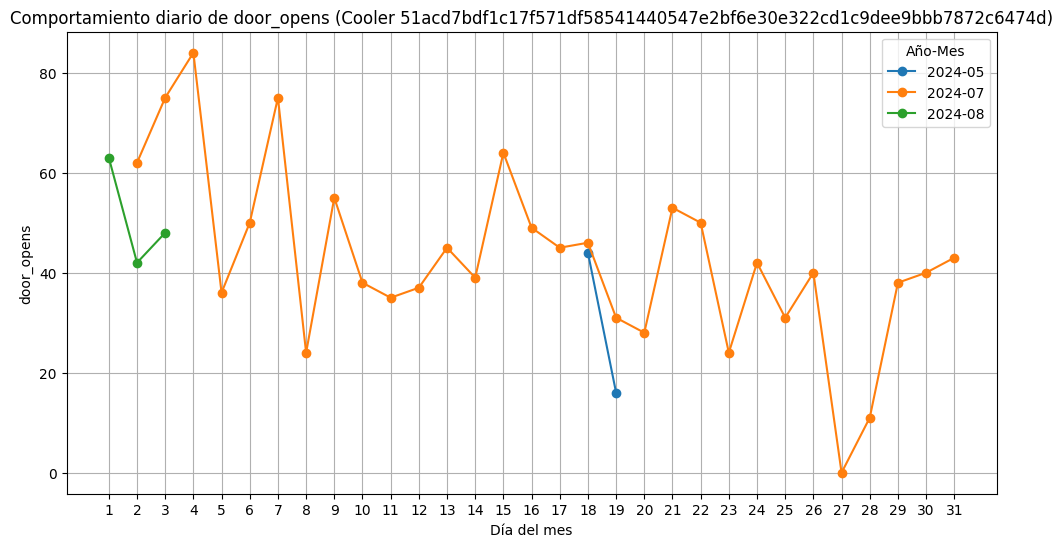

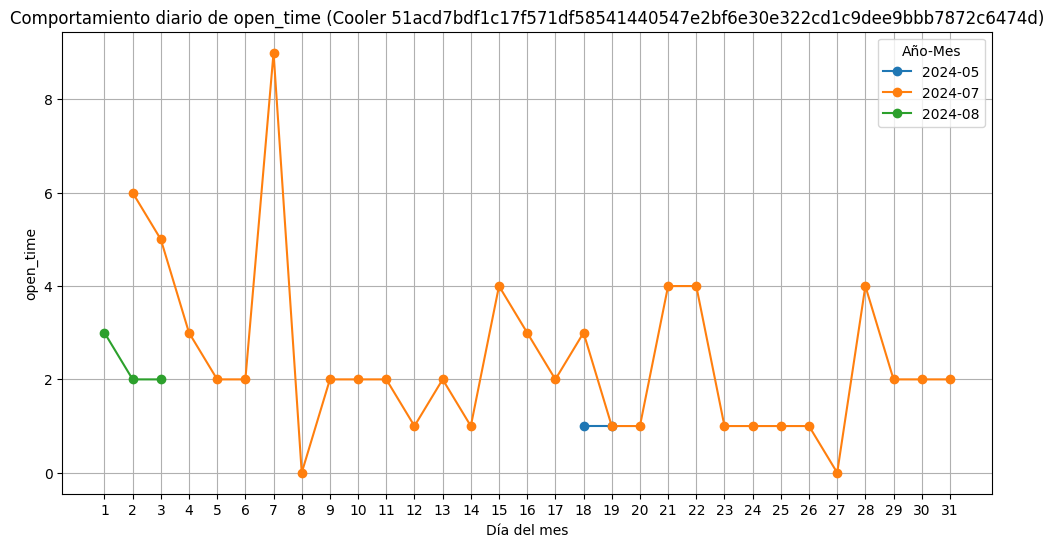

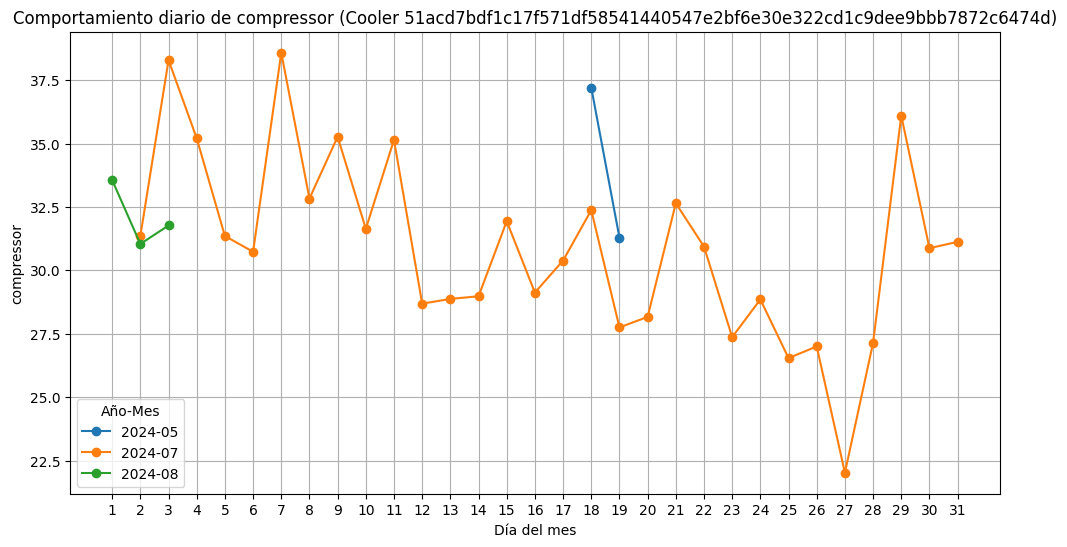

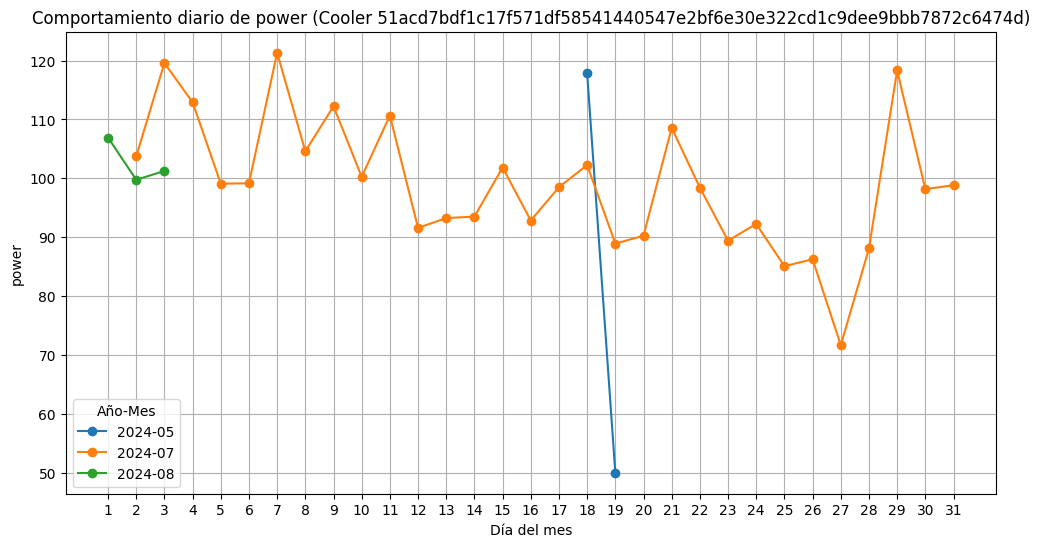

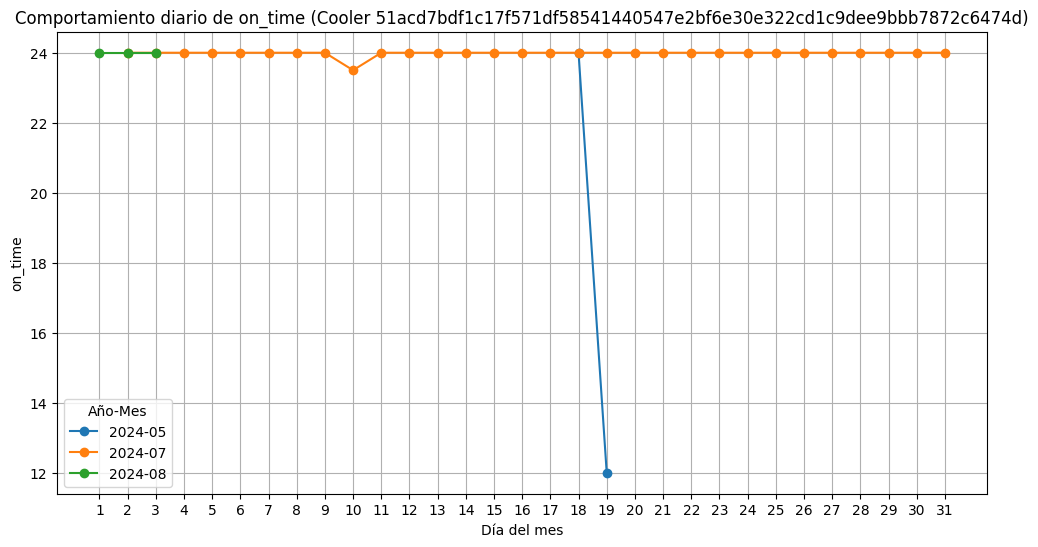

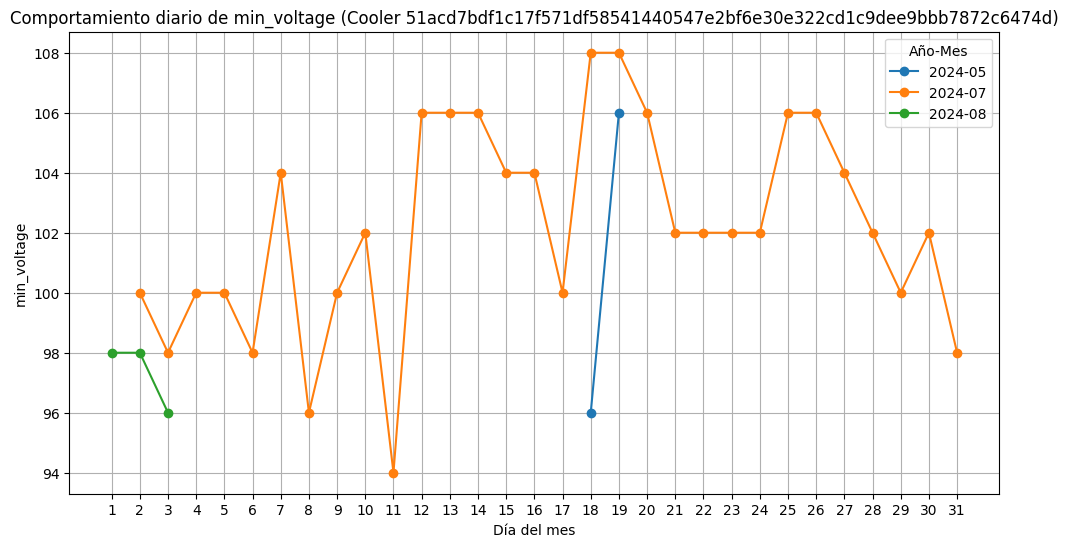

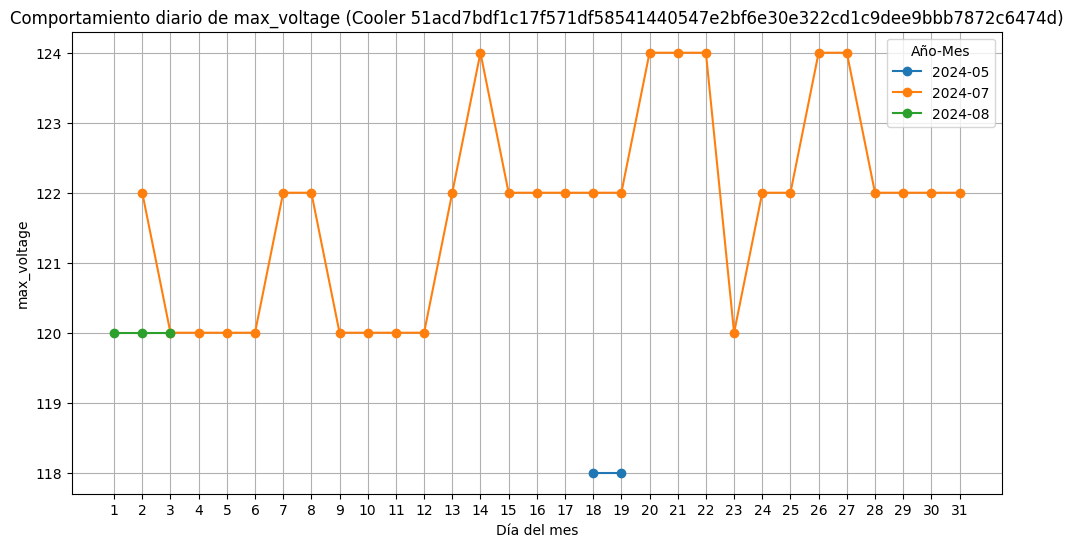

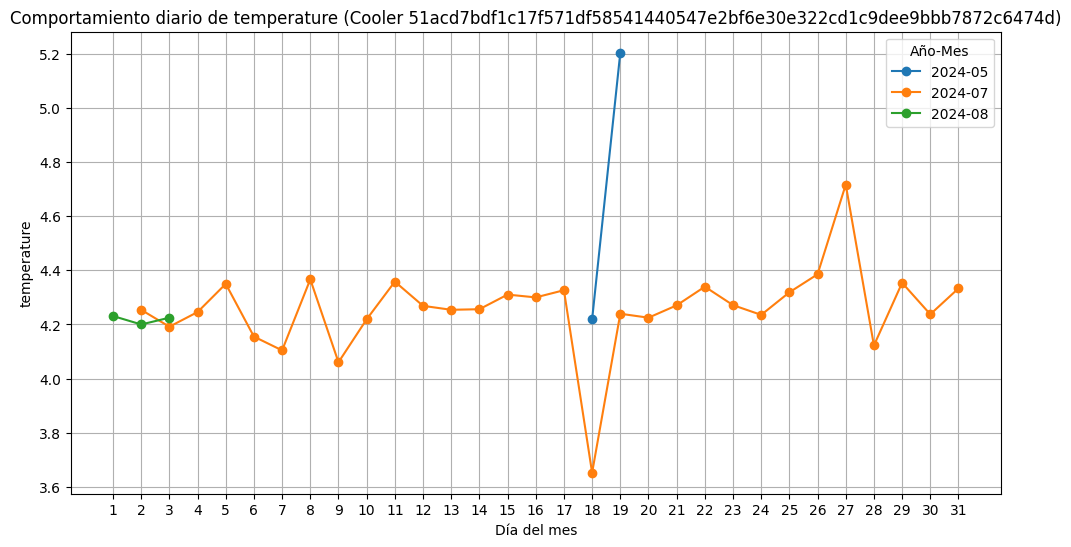

In [167]:
plot_cooler_features_by_day(falla, '51acd7bdf1c17f571df58541440547e2bf6e30e322cd1c9dee9bbb7872c6474d')

# Sales

In [389]:
sales = pd.read_csv('/Users/marielalvarez/Downloads/h4h/Hack4Her/datos/Dataset _ Coolers AC/sales.csv')


In [390]:
sales.cooler_id.value_counts()

cooler_id
42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7eebd671b1e46d4520d8    28
f98de85465b2f2b767dbc038ba0fd2e76cdfe904e31e662763d6d16e9972e4c4    28
dbd99b675f1beb60132df4fe0e7e201b5a1b67c8774a22fe817005a395a399da    28
e76b8f2d4da49e96c5d2ee3996a338d59fac077fd59be5c1d03c357cd90dc408    28
65e0cfec0337a7b07c045a16d0f329e67531db3c51d3e2f725fbc719705b9411    28
                                                                    ..
f0a91c444e810fb4a86cbf6ba4357dda1836a95f06e51dbf8b6d4fb103584d2a    28
f6a21d69862259fb78c9c4d5411e85ed05f4ff7de7aed5de5360be03b5206614    28
a5f9937f2985c4dc42e19637c52ab4667c794807d072cc3cfbed1dfe0d689e05    28
d11dc947461435f28d39096fc28b338412111ffc0ea37acaa7d8548fe160a598    28
661cc6a46677515e7801eda42d84b6242778a9d77f6062a9d9bb536f57c55e44    28
Name: count, Length: 7312, dtype: int64

In [404]:
sales.amount.describe()

count    204736.000000
mean        491.305993
std         999.858859
min         -89.325600
25%         146.002675
50%         312.407750
75%         574.966075
max       78810.177300
Name: amount, dtype: float64

In [395]:
sales.calmonth.value_counts()

calmonth
202503    7312
202412    7312
202406    7312
202304    7312
202306    7312
202504    7312
202303    7312
202501    7312
202308    7312
202411    7312
202408    7312
202305    7312
202307    7312
202403    7312
202409    7312
202312    7312
202405    7312
202301    7312
202410    7312
202302    7312
202404    7312
202402    7312
202401    7312
202311    7312
202310    7312
202502    7312
202407    7312
202309    7312
Name: count, dtype: int64

In [391]:
sales.customer_id.nunique()

6605

In [401]:
sales_clean = sales.drop(columns = ['customer_id'])

In [402]:
sales_clean

,cooler_id,calmonth,amount
0,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,202503,76.8887
1,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,202412,131.0627
2,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,202407,180.8420
3,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,202502,82.3243
4,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,202310,201.7541
...,...,...,...
204731,661cc6a46677515e7801eda42d84b6242778a9d77f6062...,202504,1244.2283
204732,661cc6a46677515e7801eda42d84b6242778a9d77f6062...,202306,1829.9476
204733,661cc6a46677515e7801eda42d84b6242778a9d77f6062...,202304,396.8060
204734,661cc6a46677515e7801eda42d84b6242778a9d77f6062...,202406,1818.3142


In [441]:
sales.cooler_id.unique()

array(['42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7eebd671b1e46d4520d8',
       'be56de8313db4d2d42f6a8c82c5f450531a7ebbdfc13d2d3aae4862bed916a55',
       '11d226915d907617e6f1ffbeb5ec732f39fd55dcb62933feb13993a23782ce92',
       ...,
       '828e2a90f84ec7b8a773fe2bb6f92e54f55c351c50c29d1d98772132d68efdbc',
       '79595feddcc8bb31000727cd53106a15cafe055b7f6284a631883e9c69f18018',
       '661cc6a46677515e7801eda42d84b6242778a9d77f6062a9d9bb536f57c55e44'],
      shape=(7312,), dtype=object)

In [440]:

def plot_cooler_amount_over_time(sales, cooler_id):
    # Filtrar por cooler_id
    cooler_data = sales[sales['cooler_id'] == cooler_id].copy()
    
    # Ordenar por calmonth
    cooler_data = cooler_data.sort_values('calmonth')
    
    # Graficar
    plt.figure(figsize=(10, 5))
    plt.plot(cooler_data['calmonth'].astype(str), cooler_data['amount'], marker='o')
    plt.title(f'Amount over Time for Cooler {cooler_id}')
    plt.xlabel('Calmonth')
    plt.ylabel('Amount')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


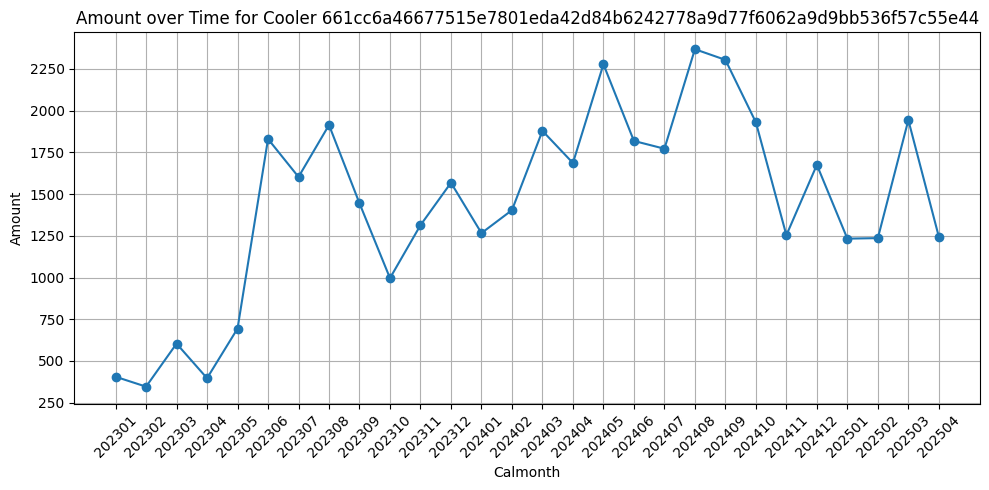

In [443]:
plot_cooler_amount_over_time(sales,'661cc6a46677515e7801eda42d84b6242778a9d77f6062a9d9bb536f57c55e44')

# Generación de modelo de regresión secuencial para pronóstico (forecasting)

In [930]:
import pandas as pd, numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

df = sales_clean.rename(columns={'cooler_id':'id', 'date':'ds', 'amount':'y'})
df = df.sort_values(['id', 'ds'])

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupShuffleSplit   

WINDOW, HORIZON = 12, 1

X, y, groups = [], [], [] 
for cid, grp in df.groupby('id'):
    series = grp['y'].values
    for i in range(len(series) - WINDOW - HORIZON + 1):
        X.append(series[i:i+WINDOW])
        y.append(series[i+WINDOW:i+WINDOW+HORIZON])
        groups.append(cid)                   

X = np.array(X)[:, :, None]
y = np.array(y)

splitter = GroupShuffleSplit(  
    n_splits=1, test_size=0.2, random_state=42)
train_idx, val_idx = next(splitter.split(X, groups=groups))

X_train, X_val = X[train_idx], X[val_idx]
y_train, y_val = y[train_idx], y[val_idx]

# 3) scalers para train y test 
x_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train.reshape(-1,1)).reshape(X_train.shape)
X_val   = x_scaler.transform(X_val.reshape(-1,1)).reshape(X_val.shape)

y_scaler = StandardScaler()
y_train  = y_scaler.fit_transform(y_train)
y_val    = y_scaler.transform(y_val)


In [932]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def safe_mape(y_true, y_pred):
    mask = y_true != 0
    if mask.sum() == 0:
        return np.nan
    return (np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])).mean() * 100

# crossvalidation
df_bt = df[df['ds'] <= '2024-12-01']

X_bt, y_bt = [], []
for _, grp in df_bt.groupby('id'):
    y_series = grp['y'].values
    for i in range(len(y_series) - WINDOW - HORIZON + 1):
        X_bt.append(y_series[i : i+WINDOW])
        y_bt.append(y_series[i+WINDOW : i+WINDOW+HORIZON])

X_bt = np.array(X_bt)[:, :, None]
y_bt = np.array(y_bt)

X_bt_flat = X_bt.reshape(-1, 1)
X_bt_scaled = scaler.transform(X_bt_flat).reshape(X_bt.shape)
y_bt_scaled = scaler.transform(y_bt)



lstm hyperparameter tunning

In [465]:
import keras_tuner as kt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

def build_model(hp):
    """
    hp : HyperParameters object (define el espacio de búsqueda)
    devuelve un modelo Keras compilado
    """
    model = Sequential()

    # --- nº de capas LSTM ---
    n_layers = hp.Int('n_layers', 1, 3, default=1)
    for i in range(n_layers):
        units = hp.Choice(f'units_{i}', [16, 32, 64, 128], default=32)
        return_sequences = i < n_layers - 1
        model.add(
            LSTM(units,
                 return_sequences=return_sequences,
                 input_shape=(WINDOW, 1) if i == 0 else None)
        )
        # dropout opcional
        drop = hp.Float(f'dropout_{i}', 0.0, 0.4, step=0.1, default=0.0)
        if drop > 0:
            model.add(Dropout(drop))

    model.add(Dense(HORIZON))

    # --- optimizador y LR ---
    lr = hp.Float('lr', 1e-4, 5e-3, sampling='log', default=1e-3)
    opt_choice = hp.Choice('optimizer', ['adam', 'rmsprop'], default='adam')
    optimizer = Adam(learning_rate=lr) if opt_choice == 'adam' else RMSprop(learning_rate=lr)

    model.compile(loss='mae', optimizer=optimizer)
    return model
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',         
    max_epochs=50,
    factor=3,                     
    directory='lstm_tuning',
    project_name='cooler_sales'
)

from tensorflow.keras.callbacks import EarlyStopping
es_cb = EarlyStopping(patience=6, restore_best_weights=True)


/Users/marielalvarez/2025/OCI/limpieza-indicadores/.conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [466]:
tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=256,
    callbacks=[es_cb],
    verbose=2
)

# Mejor combinación encontrada
best_hp   = tuner.get_best_hyperparameters(1)[0]
best_model = tuner.get_best_models(1)[0]
print('\nMejor configuración:')
for p in best_hp.values:
    print(f"{p}: {best_hp.get(p)}")


Trial 51 Complete [00h 00m 20s]
val_loss: 0.0775148794054985

Best val_loss So Far: 0.0775148794054985
Total elapsed time: 00h 13m 36s

Search: Running Trial #52

Value             |Best Value So Far |Hyperparameter
2                 |1                 |n_layers
128               |64                |units_0
0                 |0.2               |dropout_0
0.00028505        |0.0023361         |lr
adam              |adam              |optimizer
128               |16                |units_1
0                 |0.4               |dropout_1
16                |32                |units_2
0.3               |0.2               |dropout_2
50                |50                |tuner/epochs
17                |17                |tuner/initial_epoch
3                 |3                 |tuner/bracket
3                 |3                 |tuner/round
0046              |0049              |tuner/trial_id

Epoch 18/50
366/366 - 10s - 26ms/step - loss: 0.0820 - val_loss: 0.0794
Epoch 19/50
366/366 - 9s - 26

KeyboardInterrupt: 

In [472]:
best_hp = tuner.get_best_hyperparameters(1)[0]

print("\nBest hyperparameter configuration found:")
for param in best_hp.values.keys():
    print(f"{param}: {best_hp.get(param)}")



Best hyperparameter configuration found:
n_layers: 1
units_0: 64
dropout_0: 0.2
lr: 0.0023361463812106792
optimizer: adam
units_1: 16
dropout_1: 0.4
units_2: 32
dropout_2: 0.2
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0049


In [473]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

best_model = Sequential()

best_model.add(LSTM(64, input_shape=(WINDOW, 1)))
best_model.add(Dropout(0.2))

best_model.add(Dense(HORIZON))

optimizer = Adam(learning_rate=0.0023361463812106792)

best_model.compile(loss='mae', optimizer=optimizer)

# entrena best model encontrado anteriormente
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,                 
    batch_size=256,
    verbose=2
)


Epoch 1/50


/Users/marielalvarez/2025/OCI/limpieza-indicadores/.conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


366/366 - 2s - 6ms/step - loss: 0.1122 - val_loss: 0.0833
Epoch 2/50
366/366 - 2s - 5ms/step - loss: 0.0913 - val_loss: 0.0811
Epoch 3/50
366/366 - 2s - 5ms/step - loss: 0.0890 - val_loss: 0.0810
Epoch 4/50
366/366 - 2s - 5ms/step - loss: 0.0883 - val_loss: 0.0805
Epoch 5/50
366/366 - 2s - 5ms/step - loss: 0.0873 - val_loss: 0.0790
Epoch 6/50
366/366 - 2s - 5ms/step - loss: 0.0865 - val_loss: 0.0792
Epoch 7/50
366/366 - 2s - 5ms/step - loss: 0.0857 - val_loss: 0.0793
Epoch 8/50
366/366 - 2s - 5ms/step - loss: 0.0856 - val_loss: 0.0805
Epoch 9/50
366/366 - 2s - 5ms/step - loss: 0.0849 - val_loss: 0.0793
Epoch 10/50
366/366 - 2s - 5ms/step - loss: 0.0842 - val_loss: 0.0786
Epoch 11/50
366/366 - 2s - 5ms/step - loss: 0.0844 - val_loss: 0.0774
Epoch 12/50
366/366 - 2s - 5ms/step - loss: 0.0840 - val_loss: 0.0784
Epoch 13/50
366/366 - 2s - 5ms/step - loss: 0.0840 - val_loss: 0.0794
Epoch 14/50
366/366 - 2s - 5ms/step - loss: 0.0832 - val_loss: 0.0776
Epoch 15/50
366/366 - 2s - 5ms/step - lo

In [475]:
y_best_mod_pred_scaled = best_model.predict(X_bt_scaled)
y_best_mod_pred = scaler.inverse_transform(y_bt_pred_scaled)

mae  = mean_absolute_error(y_bt, y_best_mod_pred)
rmse = math.sqrt(mean_squared_error(y_bt, y_best_mod_pred))
mape = safe_mape(y_bt.flatten(), y_best_mod_pred.flatten())
print(f"MAE {mae:.1f} | RMSE {rmse:.1f} | MAPE {mape:.1f}%")


2742/2742 ━━━━━━━━━━━━━━━━━━━━ 1s 501us/step
MAE 83.0 | RMSE 278.2 | MAPE 29.0%


# probando bi-LSTM

In [491]:
# -------- BUILD ----------
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

HORIZON = 1     
WINDOW  = 12    

bi_model = Sequential([
    Bidirectional(
        LSTM(64, return_sequences=False),  
        input_shape=(WINDOW, 1)
    ),
    Dropout(0.20),
    Dense(HORIZON)                      
])

bi_model.compile(
    loss='mae',
    optimizer=Adam(learning_rate=0.0023361463812106792)
)

bi_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50, batch_size=256, verbose=2
)

# -------- BACK-TEST ----------
y_bt_pred_scaled = bi_model.predict(X_bt_scaled)        

mae  = mean_absolute_error(y_bt.ravel(), y_bt_pred.ravel())
rmse = mean_squared_error(y_bt.ravel(), y_bt_pred.ravel(), squared=False)
mape = safe_mape(y_bt.ravel(), y_bt_pred.ravel())
print(mae, rmse, mape)


Epoch 1/50


/Users/marielalvarez/2025/OCI/limpieza-indicadores/.conda/lib/python3.10/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


366/366 - 4s - 11ms/step - loss: 0.0957 - val_loss: 0.0805
Epoch 2/50
366/366 - 4s - 10ms/step - loss: 0.0862 - val_loss: 0.0790
Epoch 3/50
366/366 - 4s - 10ms/step - loss: 0.0851 - val_loss: 0.0781
Epoch 4/50
366/366 - 4s - 10ms/step - loss: 0.0844 - val_loss: 0.0792
Epoch 5/50
366/366 - 4s - 10ms/step - loss: 0.0840 - val_loss: 0.0783
Epoch 6/50
366/366 - 4s - 10ms/step - loss: 0.0838 - val_loss: 0.0785
Epoch 7/50
366/366 - 4s - 10ms/step - loss: 0.0836 - val_loss: 0.0792
Epoch 8/50
366/366 - 3s - 9ms/step - loss: 0.0831 - val_loss: 0.0791
Epoch 9/50
366/366 - 4s - 10ms/step - loss: 0.0826 - val_loss: 0.0788
Epoch 10/50
366/366 - 4s - 10ms/step - loss: 0.0825 - val_loss: 0.0793
Epoch 11/50
366/366 - 4s - 10ms/step - loss: 0.0828 - val_loss: 0.0790
Epoch 12/50
366/366 - 4s - 10ms/step - loss: 0.0824 - val_loss: 0.0797
Epoch 13/50
366/366 - 4s - 10ms/step - loss: 0.0827 - val_loss: 0.0792
Epoch 14/50
366/366 - 4s - 10ms/step - loss: 0.0825 - val_loss: 0.0789
Epoch 15/50
366/366 - 4s - 

TypeError: got an unexpected keyword argument 'squared'

In [493]:
mae  = mean_absolute_error(y_bt.ravel(), y_bt_pred.ravel())
rmse = math.sqrt(mean_squared_error(y_bt.ravel(), y_bt_pred.ravel()))
mape = safe_mape(y_bt.ravel(), y_bt_pred.ravel())
print(mae, rmse, mape)


82.22830014309804 227.39149593056942 27.755672771079855


### MODELO Sequential Bi-LSTM

In [498]:
may_forecasts = []

for cid, grp in df.groupby('id'):
    last_12 = grp.tail(WINDOW)['y'].values
    if len(last_12) < WINDOW:
        continue  
    X_input = x_scaler.transform(last_12.reshape(-1,1)).reshape(1, WINDOW, 1)
    y_pred_scaled = bi_model.predict(X_input, verbose=0)
    y_pred = y_scaler.inverse_transform(y_pred_scaled)[0,0]
    may_forecasts.append({'id': cid, 'forecast_may2025': y_pred})

may_forecasts_df = pd.DataFrame(may_forecasts)


In [500]:
may_forecasts_df.forecast_may2025.describe()

count     7312.000000
mean       529.186218
std       1091.862671
min          6.190371
25%        157.461960
50%        327.543900
75%        603.637909
max      40115.667969
Name: forecast_may2025, dtype: float64

# analisis en sales causado por fallas

In [755]:
final = pd.read_csv('Fallas_con_target.csv')

In [756]:
final = final.drop(columns = ['Unnamed: 0'])

In [757]:
final['calmonth'] = pd.to_datetime(final['year'].astype(str) + '-' + final['month'].astype(str).str.zfill(2) + '-01')

agg_df = final.groupby(['cooler_id', 'calmonth']).agg(
    {**{col: 'median' for col in final.select_dtypes(include=['number']).columns if col != 'Target'},
     'Target': 'max'}
).reset_index()

agg_df.head()

,cooler_id,calmonth,door_opens,open_time,compressor,power,on_time,min_voltage,max_voltage,temperature,warning,year,month,Target
0,000ad42d24871bed8a139f101c46dd14f499dadc8f26a5...,2024-03-01,36.5,2.5,32.40415,1.9583,24.0,109.0,129.0,4.92315,1.0,2024.0,3.0,0
1,000ad42d24871bed8a139f101c46dd14f499dadc8f26a5...,2024-04-01,182.5,53.0,89.22545,1.4583,24.0,110.0,128.0,12.56725,1.0,2024.0,4.0,1
2,000ad42d24871bed8a139f101c46dd14f499dadc8f26a5...,2024-05-01,NaN,0.0,NaN,NaN,24.0,NaN,NaN,NaN,1.0,2024.0,5.0,1
3,000ad42d24871bed8a139f101c46dd14f499dadc8f26a5...,2024-06-01,NaN,0.0,NaN,NaN,24.0,NaN,NaN,NaN,1.0,2024.0,6.0,0
4,000ad42d24871bed8a139f101c46dd14f499dadc8f26a5...,2024-09-01,NaN,0.0,NaN,NaN,24.0,NaN,NaN,NaN,1.0,2024.0,9.0,0


In [758]:
len(agg_df)

269

In [759]:
agg_df.isna().sum()

cooler_id       0
calmonth        0
door_opens     39
open_time       0
compressor     39
power          39
on_time         0
min_voltage    39
max_voltage    39
temperature    39
warning         0
year            0
month           0
Target          0
dtype: int64

In [760]:
agg_df.calmonth.unique()

<DatetimeArray>
['2024-03-01 00:00:00', '2024-04-01 00:00:00', '2024-05-01 00:00:00',
 '2024-06-01 00:00:00', '2024-09-01 00:00:00', '2024-11-01 00:00:00',
 '2023-11-01 00:00:00', '2023-12-01 00:00:00', '2024-01-01 00:00:00',
 '2024-08-01 00:00:00', '2024-10-01 00:00:00', '2024-02-01 00:00:00',
 '2025-01-01 00:00:00', '2025-02-01 00:00:00', '2023-08-01 00:00:00',
 '2023-09-01 00:00:00', '2023-10-01 00:00:00', '2024-07-01 00:00:00',
 '2024-12-01 00:00:00', '2023-01-01 00:00:00', '2023-05-01 00:00:00',
 '2023-06-01 00:00:00', '2023-07-01 00:00:00', '2025-03-01 00:00:00',
 '2023-03-01 00:00:00', '2023-04-01 00:00:00', '2023-02-01 00:00:00']
Length: 27, dtype: datetime64[ns]

In [761]:
agg_df['calmonth'] = agg_df['calmonth'].astype(str)

In [762]:
sales['calmonth'] = sales['calmonth'].astype(str)

In [829]:
sales_completas = sales.merge(agg_df, on=['cooler_id', 'calmonth'], how='left')

sales_completas.head()


,cooler_id,customer_id,calmonth,amount,door_opens,open_time,compressor,power,on_time,min_voltage,max_voltage,temperature,warning,year,month,Target
0,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,e21b830bc395b5a355f68a698c55ad95474f929d8e2521...,2025-03-01,76.8887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,e21b830bc395b5a355f68a698c55ad95474f929d8e2521...,2024-12-01,131.0627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,e21b830bc395b5a355f68a698c55ad95474f929d8e2521...,2024-07-01,180.8420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,e21b830bc395b5a355f68a698c55ad95474f929d8e2521...,2025-02-01,82.3243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,e21b830bc395b5a355f68a698c55ad95474f929d8e2521...,2023-10-01,201.7541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [830]:
sales_completas.isna().sum()

cooler_id           0
customer_id         0
calmonth            0
amount              0
door_opens     204506
open_time      204467
compressor     204506
power          204506
on_time        204467
min_voltage    204506
max_voltage    204506
temperature    204506
warning        204467
year           204467
month          204467
Target         204467
dtype: int64

In [633]:
merged_df.columns

Index(['cooler_id', 'customer_id', 'calmonth', 'amount', 'door_opens',
       'open_time', 'compressor', 'power', 'on_time', 'min_voltage',
       'max_voltage', 'temperature', 'warning', 'year', 'month', 'Target'],
      dtype='object')

In [634]:
not_null = merged_df[~merged_df.compressor.isna()]

In [635]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_sales_vs_failures(df, cooler_id, window=3):
    """
    Para un cooler, muestra:
      A. Línea doble Amount (ventas) y Target (fallas) por mes
      B. Rolling window de Amount vs suma de fallas
      C. Scatter Amount vs Target con ajuste de regresión
    Devuelve un diccionario con estadísticas básicas.
    """
    # --- Filtrado y orden ---
    data = (df[df['cooler_id'] == cooler_id]
              .sort_values('calmonth')
              .reset_index(drop=True))
    
    if data.empty:
        raise ValueError(f"No se encontraron datos para cooler {cooler_id}")

    # --- Resumen numérico ---
    corr = data['amount'].corr(data['Target'])
    stats = {
        'cooler_id': cooler_id,
        'observations': len(data),
        'total_sales': data['amount'].sum(),
        'total_failures': data['Target'].sum(),
        'corr_amount_target': corr
    }

    # --- A) Línea doble ---
    fig, ax1 = plt.subplots(figsize=(10, 4))
    ax2 = ax1.twinx()
    ax1.plot(data['calmonth'], data['amount'],  marker='o', label='Amount')
    ax2.bar(data['calmonth'], data['Target'], alpha=0.3, color='crimson', label='Target (failures)')
    ax1.set_ylabel('Amount')
    ax2.set_ylabel('Target')
    ax1.set_title(f"Ventas vs. Fallas – Cooler {cooler_id}")
    ax1.legend(loc='upper left'); ax2.legend(loc='upper right')
    plt.show()

    # --- B) Rolling window (ventas media / fallas acumuladas) ---
    roll_amt   = data['amount'].rolling(window).mean()
    roll_fail  = data['Target'].rolling(window).sum()
    plt.figure(figsize=(10, 3))
    plt.plot(data['calmonth'], roll_amt, label=f'Amount MA{window}')
    plt.plot(data['calmonth'], roll_fail, label=f'Failures Σ{window}', color='crimson')
    plt.title(f"Media móvil vs. Suma móvil ({window} meses)")
    plt.legend(); plt.ylabel('Valor'); plt.show()

    # --- C) Scatter con ajuste ---
    plt.figure(figsize=(5, 4))
    sns.regplot(x='Target', y='amount', data=data, scatter_kws={'alpha':0.7})
    plt.title("Relación puntual ventas-fallas")
    plt.xlabel('Fallas (Target)'); plt.ylabel('Ventas (Amount)'); plt.tight_layout()
    plt.show()

    return stats


In [636]:
not_null[not_null.Target != 0].sample().cooler_id.unique()

array(['8490e3d2e2bf90a2eaef9d0d17d06b5a55d40822c8a9c37600359b934710fe92'],
      dtype=object)

In [734]:
not_null.cooler_id.nunique()

53

In [739]:
not_null.groupby(['Target'])['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0.0,171.0,786.749003,1512.732139,0.0,247.07720,406.9674,731.2317,10227.4902
1.0,59.0,1014.474312,2154.666239,0.0,117.14025,345.5238,491.8083,10772.5345


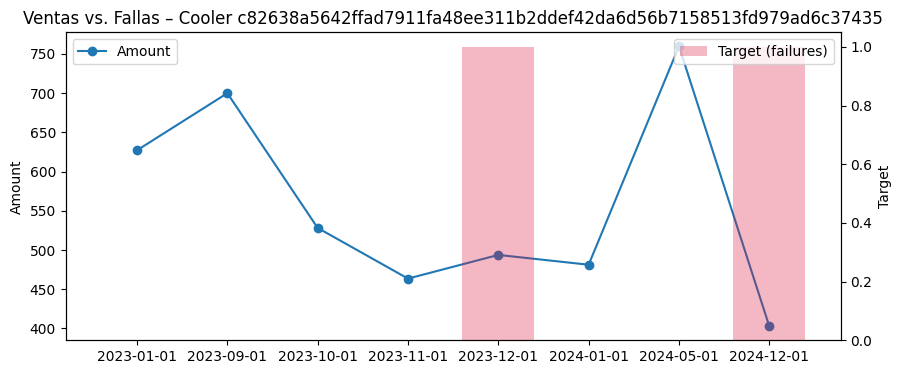

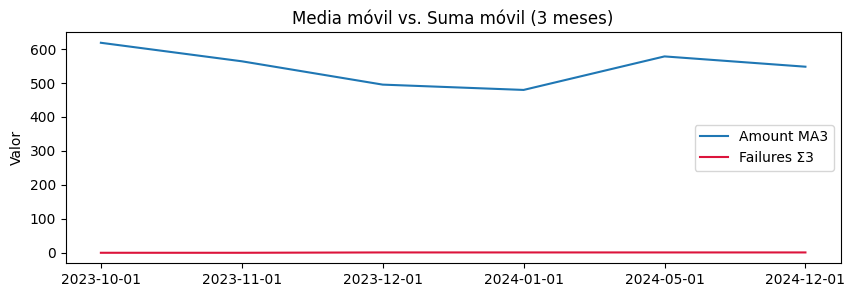

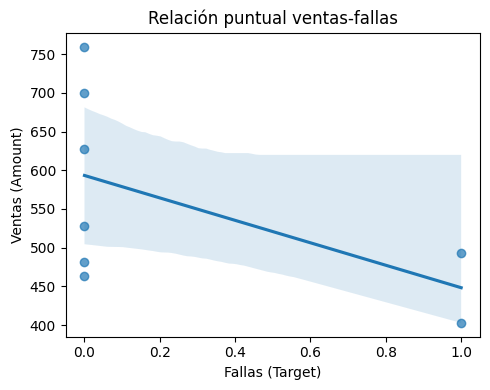

{'cooler_id': 'c82638a5642ffad7911fa48ee311b2ddef42da6d56b7158513fd979ad6c37435',
 'observations': 8,
 'total_sales': np.float64(4456.2491),
 'total_failures': np.float64(2.0),
 'corr_amount_target': np.float64(-0.5366880130590584)}

In [637]:
analyze_sales_vs_failures(not_null, cooler_id='c82638a5642ffad7911fa48ee311b2ddef42da6d56b7158513fd979ad6c37435')

In [663]:
may_forecasts_df

,id,forecast_may2025
0,000ad42d24871bed8a139f101c46dd14f499dadc8f26a5...,22.982790
1,000c011eca9990bc07e6577a13dc0ad3bc0bb2e5b628f4...,815.509644
2,0016ec5ff0bab59a840bfb35f19432270b06e821b6807f...,419.170929
3,00190192bd70e98a2399c87c883f9abd122ddf1ea91515...,23.526674
4,001eacd5c959eff51b42e8855473e89be89b46e8a5d0d8...,1611.837524
...,...,...
7307,ff8d8032ac28d703ded192d43d1dd9aca2d273b17cc779...,461.473969
7308,ff9f7cbc92b9438606e71c81a3ff6f50bc67cc9d18fd40...,67.292480
7309,ffa3148ec56ed342b92f8e59cd6bd850be15f7c6d9ed53...,650.106750
7310,ffd2144deafdf3276fe4c69cbd9126d98ae71b84116fb3...,195.255280


In [664]:
may_forecasts_df.to_csv('sales_predicted_may.csv')

In [665]:
may_forecasts_df = may_forecasts_df.rename(columns={
    'id': 'cooler_id',
    'forecast_may2025': 'amount'
})

In [669]:
may_forecasts_df['calmonth'] = '2025-05-01'

In [680]:
total_sales = pd.concat([may_forecasts_df, sales[['cooler_id', 'amount', 'calmonth']]])

In [683]:
total_sales.to_csv('sales_totales.csv')

In [657]:
import pickle, joblib
bi_model.save("models/bi_lstm.h5")           # modelo
joblib.dump(x_scaler, "models/x_scaler.pkl") # scaler de entrada
joblib.dump(y_scaler, "models/y_scaler.pkl") # scaler de salida

['models/y_scaler.pkl']

# Análisis de ventas en Mayo con coolers que fallarán

In [944]:
proba = pd.read_csv('probabilidad_mayo_redondeado.csv')

In [946]:
proba

,Unnamed: 0,cooler_id,proba_mensual
0,198,0a104fd4b4d1b9bc6d91d31e7150f092ca3f70d0b31354...,1.0000
1,1169,3b09d3fed04826214dbe7f1ed12d44dceaa5439ef0f0ac...,1.0000
2,61,0351763ff32cf20f54aaaba1ded070c8d330ef400e51a5...,0.9999
3,63,03627bc4fc2715b0bec54b738a62a40ec71a46f9c2ed76...,0.9999
4,124,069d4f4967152f41ba9489d4ce13cc07c7203d61b482b6...,0.9999
...,...,...,...
4870,1899,60bfd074bf531c34a7fcba997b9849669f328e6400e8ed...,0.0100
4871,1013,337ed25b837a06a71f317219fee716b224d36d8cc55752...,0.0066
4872,1221,3d4270c11adf839f9e3e8a3a55367b8638952320a08791...,0.0000
4873,1355,43d2ba1862e7b191e02cc6f28e625bdcf08afee437d4ad...,0.0000


In [947]:
proba = proba.drop(columns= ['Unnamed: 0'])

In [948]:
proba.to_csv('proba_mayo.csv',index=False)

In [949]:
total_sales['calmonth'] = pd.to_datetime(total_sales['calmonth'])

mayo_df = total_sales[
    (total_sales['calmonth'].dt.year == 2025) &
    (total_sales['calmonth'].dt.month == 5)
].copy()

otros_df = total_sales[
    ~(
        (total_sales['calmonth'].dt.year == 2025) &
        (total_sales['calmonth'].dt.month == 5)
    )
]

agg_df = (
    otros_df.groupby('cooler_id')['amount']
    .agg(media_ventas='mean', mediana_ventas='median')
    .reset_index()
)

mayo_df = mayo_df.merge(agg_df, on='cooler_id', how='left')


/var/folders/l9/hx3k3fcs03d6gz71m2n3t1c80000gn/T/ipykernel_11980/1174982213.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


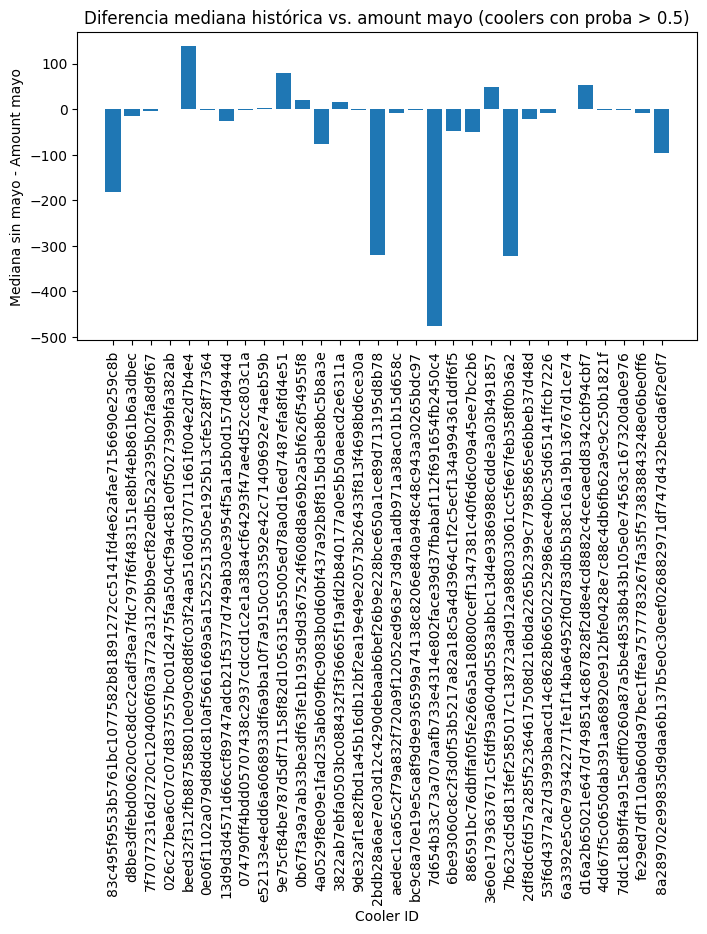

In [950]:
resultados = mayo_df.merge(proba, on='cooler_id', how='inner')

high_risk_df = resultados[resultados['proba_mensual'] > 0.7].copy()

high_risk_df['diff_median_amount'] =  high_risk_df['mediana_ventas'] - high_risk_df['amount']
high_risk_sample = high_risk_df.sample(30)
plt.figure(figsize=(8,4))
plt.bar(high_risk_sample['cooler_id'], high_risk_sample['diff_median_amount'])
plt.xlabel('Cooler ID')
plt.ylabel('Mediana sin mayo - Amount mayo')
plt.title('Diferencia mediana histórica vs. amount mayo (coolers con proba > 0.5)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [951]:
high_risk_df['diff_median_amount'].describe()

count    2186.000000
mean      -50.077653
std       265.240435
min     -5393.105483
25%       -49.615673
50%        -7.648318
75%        13.740724
max       658.946904
Name: diff_median_amount, dtype: float64

#### el beneficio potencial debe estar ligado a lo que se espera vender en mayo

In [952]:
sales.amount.describe()

count    204736.000000
mean        491.305993
std         999.858859
min         -89.325600
25%         146.002675
50%         312.407750
75%         574.966075
max       78810.177300
Name: amount, dtype: float64

In [953]:
results.beneficio_esperado.describe()

count    4875.000000
mean       58.230498
std       150.829216
min         0.000000
25%        11.032367
50%        28.313369
75%        64.729054
max      4791.461655
Name: beneficio_esperado, dtype: float64

In [954]:
summary = (
    merged
      .groupby(['cooler_id', 'Target'])['amount']
      .median()
      .unstack(fill_value=0)               
      .rename(columns={0: 'mean_amount_funciona',
                       1: 'mean_amount_falla'})
      .reset_index()
)
summary

Target,cooler_id,mean_amount_funciona,mean_amount_falla
0,000ad42d24871bed8a139f101c46dd14f499dadc8f26a5...,22.31950,31.8051
1,000c011eca9990bc07e6577a13dc0ad3bc0bb2e5b628f4...,773.59255,0.0000
2,0016ec5ff0bab59a840bfb35f19432270b06e821b6807f...,422.42770,0.0000
3,00190192bd70e98a2399c87c883f9abd122ddf1ea91515...,17.49450,0.0000
4,001eacd5c959eff51b42e8855473e89be89b46e8a5d0d8...,1508.48050,0.0000
...,...,...,...
7307,ff8d8032ac28d703ded192d43d1dd9aca2d273b17cc779...,445.47075,0.0000
7308,ff9f7cbc92b9438606e71c81a3ff6f50bc67cc9d18fd40...,101.52465,0.0000
7309,ffa3148ec56ed342b92f8e59cd6bd850be15f7c6d9ed53...,611.56335,0.0000
7310,ffd2144deafdf3276fe4c69cbd9126d98ae71b84116fb3...,222.86105,0.0000


In [955]:
summary_fallas = summary[summary.mean_amount_falla != 0]

In [956]:
summary_funciona = summary[summary.mean_amount_falla == 0]

In [957]:
summary_funciona.describe()

Target,mean_amount_funciona,mean_amount_falla
count,7282.000000,7282.0
mean,478.691384,0.0
std,923.694881,0.0
min,0.000000,0.0
25%,150.626900,0.0
50%,311.593825,0.0
75%,567.207700,0.0
max,41085.006050,0.0


In [958]:
summary_fallas.describe()

Target,mean_amount_funciona,mean_amount_falla
count,30.000000,30.000000
mean,822.437690,929.822803
std,1570.458705,1746.960326
min,6.412100,2.588900
25%,201.690800,246.733250
50%,328.321800,358.743000
75%,611.777125,631.249163
max,6618.544150,7873.526700


In [959]:
summary_fallas[summary_fallas.mean_amount_funciona > 500]

Target,cooler_id,mean_amount_funciona,mean_amount_falla
458,0fb620ffe915a5255914b611cfae5a075274893fab35bd...,634.11315,528.41835
530,12ef32f2133e68b37554f01de6a72e38c1fa1985585a71...,860.81920,1238.70360
1544,35d532dc23d4b4fb12a571c630c3b159514fb86f61e5c6...,1658.45910,2653.09250
2346,5005dc421283c3024eeedd99caa4ec7e8a067cc2986792...,744.06200,760.29330
3065,69a502ea2c89a5f61d16ce534026afa43727a85dc6433b...,515.21380,487.81420
3288,72980eb969bf38742a27b57becd625f4a3f03ae6392fbf...,6618.54415,7873.52670
3731,8185ce2b48ece3e2b5493d61a08a77aa1bd883815a2b62...,542.52260,665.52610
4919,ab25aa1218e09fb535191fcff9a3c3d2907b1617275d0d...,1291.63855,1612.62380
4989,adb348e6e3b97ce1d07627f7dde4ae5d68fa3f92207a96...,958.29280,1301.59010
5728,c82638a5642ffad7911fa48ee311b2ddef42da6d56b715...,544.76905,448.29455


In [960]:
summary_fallas['pct_error'] = (
    (summary_fallas['mean_amount_falla'] - summary_fallas['mean_amount_funciona'])
    / summary_fallas['mean_amount_funciona']
) 

/var/folders/l9/hx3k3fcs03d6gz71m2n3t1c80000gn/T/ipykernel_11980/1804575714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_fallas['pct_error'] = (


In [961]:
summary_fallas[summary_fallas.pct_error < 0].pct_error.describe()

count    12.000000
mean     -0.206859
std       0.166875
min      -0.596248
25%      -0.262056
50%      -0.158656
75%      -0.093488
max      -0.031894
Name: pct_error, dtype: float64

<Axes: >

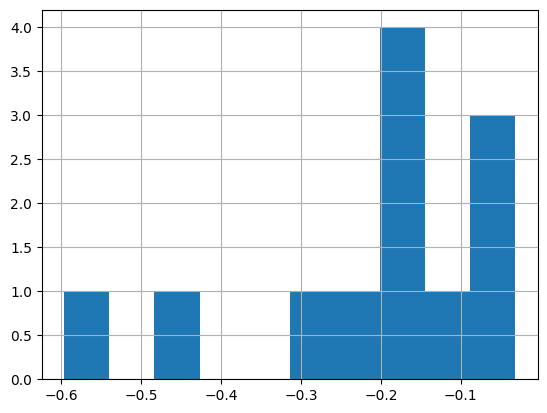

In [962]:
summary_fallas[summary_fallas.pct_error < 0].pct_error.hist()

# beneficio esperado final

In [963]:
mayo_df['beneficio_potencial'] = (
    mayo_df['media_ventas'] - mayo_df['amount']
).clip(lower=0)

results = mayo_df.merge(proba, on='cooler_id', how='inner')

results['beneficio_potencial'] = results['amount'] * 0.2
prob_recuperacion = 0.97

results['beneficio_esperado'] = (
    results['beneficio_potencial'] *
    results['proba_mensual'] * prob_recuperacion
)

total_beneficio = results['beneficio_esperado'].sum()
print(f"Beneficio esperado total: {total_beneficio:,.2f}")


Beneficio esperado total: 283,850.63


In [975]:
results[['cooler_id', 'amount', 'beneficio_esperado']].to_csv('ventas_benefico_mayo.csv', index = False)

In [964]:
results.sort_values(by = 'proba_mensual', ascending = False)

,cooler_id,amount,calmonth,media_ventas,mediana_ventas,beneficio_potencial,proba_mensual,beneficio_esperado
198,0a104fd4b4d1b9bc6d91d31e7150f092ca3f70d0b31354...,7.648318,2025-05-01,0.000000,0.00000,1.529664,1.0000,1.483774
1169,3b09d3fed04826214dbe7f1ed12d44dceaa5439ef0f0ac...,7.648318,2025-05-01,0.000000,0.00000,1.529664,1.0000,1.483774
61,0351763ff32cf20f54aaaba1ded070c8d330ef400e51a5...,356.596436,2025-05-01,351.146021,238.33990,71.319287,0.9999,69.172791
944,2fa1d748d28f3e69cad758de3d268f160583e3310c34bf...,577.941162,2025-05-01,632.351475,611.89070,115.588232,0.9999,112.109373
2538,830304b137ae7623770e13da96f70258ae0bac7f0afd7f...,770.762390,2025-05-01,681.798575,669.87585,154.152478,0.9999,149.512951
...,...,...,...,...,...,...,...,...
1899,60bfd074bf531c34a7fcba997b9849669f328e6400e8ed...,59.911076,2025-05-01,59.297543,58.90310,11.982215,0.0100,0.116227
1013,337ed25b837a06a71f317219fee716b224d36d8cc55752...,118.255646,2025-05-01,163.092175,149.59585,23.651129,0.0066,0.151415
2742,8da7a0999a4f5b1255fe67a5178a0efbe641ba7a4ac0e4...,628.152771,2025-05-01,711.084000,708.74725,125.630554,0.0000,0.000000
1355,43d2ba1862e7b191e02cc6f28e625bdcf08afee437d4ad...,183.949493,2025-05-01,114.403482,129.59075,36.789899,0.0000,0.000000


In [941]:
proba

,cooler_id,proba_mensual
0,0a104fd4b4d1b9bc6d91d31e7150f092ca3f70d0b31354...,1.000000
1,3b09d3fed04826214dbe7f1ed12d44dceaa5439ef0f0ac...,1.000000
2,9a1ed8b60a11db001cab203b52e8a34aa3311e61e8c463...,1.000000
3,49ee85148d66dd8d6f8d57d401b41d3d5df27af0f0269a...,1.000000
4,c3b701d7ce834cb58298c2658188e23b597ebb23f56b63...,1.000000
...,...,...
4870,60bfd074bf531c34a7fcba997b9849669f328e6400e8ed...,0.010000
4871,337ed25b837a06a71f317219fee716b224d36d8cc55752...,0.006667
4872,3d4270c11adf839f9e3e8a3a55367b8638952320a08791...,0.000000
4873,43d2ba1862e7b191e02cc6f28e625bdcf08afee437d4ad...,0.000000


In [967]:
mayo_df.amount.sum()

np.float64(3869409.4569163322)

In [ ]:
mayo_df.amount.sum()